### Question 1

##### Part (a)

The primal LP is written as follows:


Let $$ s_1 $$ denote the number of small chessboxes



Let $$ s_2 $$ denote the number of big boxes

Then, the following constraints apply
$$
3s_1 + 2s_2 <= 160
$$
$$
s_1 + 4s_2 <= 200
$$
$$
s_1 >= 0
$$
$$
s_2 >= 0
$$

The equation to maximize will be
$$
    5s_1 + 8s_2
$$

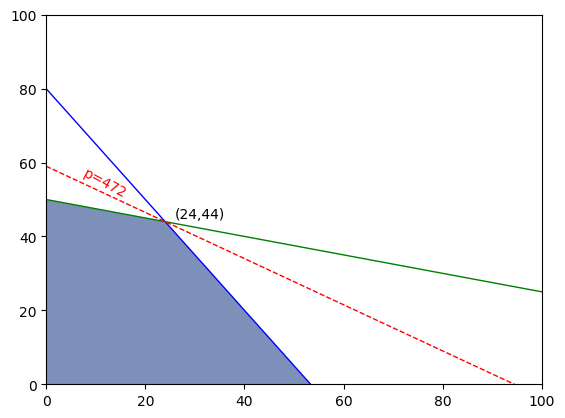

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x7f73a6143b90>

In [19]:
using PyPlot


xlim(0,100)
ylim(0,100)

# plotting the first constraint
x = linspace(0,100)
y = (160/2) - (3/2)x
plot(x,y,"b-",linewidth=1)


# plotting the second constraint
y = (200/4) - (x/4)
plot(x,y,"g-",linewidth = 1)

# plotting the profit function
y = (472/8) - (5/8)x
plot(x,y,"r--",linewidth = 1)
text(7,56,"p=472", color = "r",rotation = -28)

text(26,45,"(24,44)",fontsize = 10)
x=[0,0,24,53.333,0]
y=[0,50,44,0,0]
fill(x,y,"#7D90BA")

By solving the linear constraints graphically, we are obtaining that there be made 24 pieces of the small boxes and 44 pieces of the big boxes at a profit of \$472.00

##### Part (b)

Here, we convert the constraints from part (a) into their dual. They are as follows:

$$
3l_1 + l_2 >= 5
$$
$$
2l_1 + 4l_2 >= 8
$$

The equation to maximize will be

$$
160l_1 + 200l_2
$$

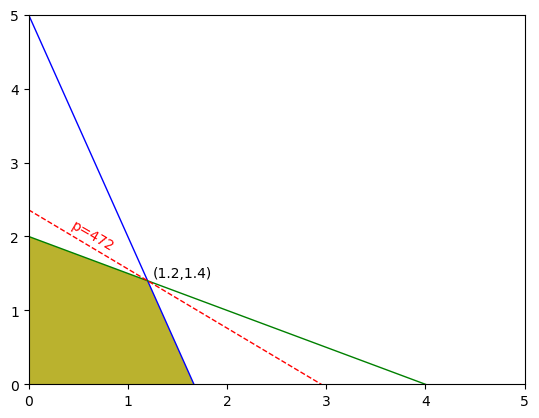

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.patches.Polygon object at 0x7f73a586d7d0>

In [39]:

xlim(0,5)
ylim(0,5)

x = linspace(0,5)

#plot the first constraint
y = 5 - 3x
plot(x,y,"b-",linewidth = 1)

#plot the second constraint
y = (8/4) - (2/4)x
plot(x,y,"g-",linewidth = 1)

text(1.25,1.45,"(1.2,1.4)",fontsize = 10)

#plotting the profit
y = (472/200) - (160/200)x
plot(x,y,"r--",linewidth = 1)
text(0.4,2.1,"p=472",rotation = -30, color = "r")

x = [0,0,1.2,1.6667,0]
y = [0,2,1.4,0,0]

fill(x,y,"#BAB22E")

Hence, the values for the optimal values of l_1 and l_2 are 1.2 and 1.4 respectively. The profit values obtained by the objective functions is \$472.00 . Hence, verified.

## Question 2



##### Part (a)

In [44]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)


n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );
nutrients[3]

"Calcium (g)"

In [47]:
using JuMP, Clp
m = Model(solver=ClpSolver())


@variable(m, food[foods] >= 0)    
#create a constraint for the obtaining the correct amount of nutrients
@constraint(m, constr[i in nutrients], sum(data[f,i]*food[f] for f in foods) >= lower[i])
# The objective function
@objective(m, Min, sum(food))
status = solve(m)
println(status)
println("Cost per of calcium per gram: \$", getdual(constr[nutrients[3]]))
println("Cost of diet per day = ", getvalue(sum(food)))
println("Cost of diet per year = ", getvalue(sum(food))*365)
    println("List of foods: ")
    for i in 1:length(food)
        if getvalue(food[foods[i]]) != 0
            println(foods[i])
        end
    end

Optimal
Cost per of calcium per gram: $0.031737713445637035
Cost of diet per day = 0.10866227820675685
Cost of diet per year = 39.66173154546625
List of foods: 
Wheat Flour (Enriched)
Liver (Beef)
Cabbage
Spinach
Navy Beans, Dried


In [75]:

# import Stigler's data set
raw = readcsv("stigler_withCalcium.csv")
(m,n) = size(raw)


n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );


using JuMP, Clp
m = Model(solver=ClpSolver())

@variable(m, food[foods] >= 0)    
#create a constraint for the obtaining the correct amount of nutrients
@constraint(m, constr[i in nutrients], sum(data[f,i]*food[f] for f in foods) >= lower[i])
# The objective function
@objective(m, Min, sum(food))
status = solve(m)
println(status)
println("Cost of diet per day = ", getvalue(sum(food)))
println("Cost of diet per year = ", getvalue(sum(food))*365)
    println("List of foods: ")
    for i in 1:length(food)
        if getvalue(food[foods[i]]) != 0
            println(foods[i])
        end
    end

Optimal
Cost of diet per day = 0.09017464462052424
Cost of diet per year = 32.91374528649135
List of foods: 
Wheat Flour (Enriched)
Liver (Beef)
Cabbage
Spinach
Calcium Pills


Hence, we can see that the new diet consisting of Calcium Pills is \$6.74798625897 lesser than the diet without calcium pills


### Question 3

##### Part (a)

In [129]:
using JuMP, Clp

obj_values = []
sin_values = []
cos_values = []
p_values = []
q_values= []
r_values= []
s_values=[]


for t = linspace(0,2pi)
    m = Model(solver=ClpSolver())
    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    @objective(m, Min, p + q + r + s)
    push!(cos_values, cos(t))
    push!(sin_values, sin(t))

    solve(m)
    push!(p_values,getvalue(p))
    push!(q_values,getvalue(q))
    push!(r_values,getvalue(r))
    push!(s_values,getvalue(s))
    push!(obj_values, getobjectivevalue(m))
    #println(getobjectivevalue(m))
end
#s_values

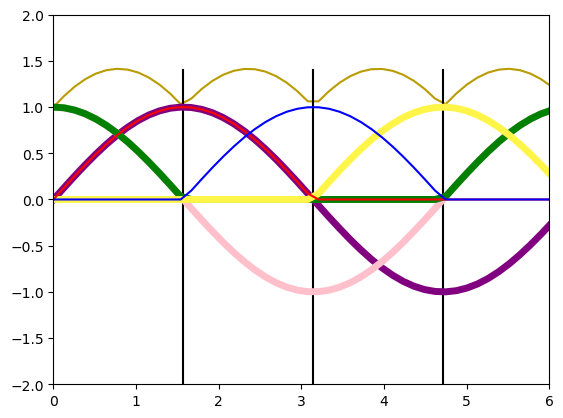

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f739b4f1e90>

In [168]:
t = linspace(0, 2pi)
plot(t, obj_values, color = "#BA9B00")

xlim(0,6)
ylim(-2,2)

plot([pi/2 for i in 1:length(t)], linspace(-2,1.4), color = "black")
plot([pi for i in 1:length(t)], linspace(-2,1.4), color = "black")
plot([3pi/2 for i in 1:length(t)], linspace(-2,1.4), color = "black")
plot([2pi for i in 1:length(t)], linspace(-2,1.4), color = "black")

plot(t, sin_values, color = "purple", linewidth = 5) #thick purple line
plot(t, cos_values, color = "pink", linewidth = 5) # thick pink line
plot(t, p_values, color = "g", linewidth = 5) # thick green line
plot(t, s_values, color = "#FFF549", linewidth = 5) # thick bright yellow line
plot(t, q_values, color = "r") #thin red line
plot(t, r_values, color = "b") #thin blue line


In the above plot, the objective function is plotted in Gold color. 4 black lines have been plotted vertical to the x-axis to describe the points where x takes the values of pi/2, 3pi/2 and 2pi respectively. We notice that the plot of the objective function rises and falls within each of these black lines. This can be explained by plotting the graphs of the constraints and the other constraints. We can explain the resultant objective plot by inspecting the shifting values of p,q,r,s and sin and cos within the ranges  described by the black lines. 

* 0 -> $\Pi$/2 :
    In this range, s is 0 while q takes the value of sin(t). Similarly, r is 0 while p takes the value of cos(t). Hence, the objective function will always take a value that is >= 1 
* $\Pi$/2 -> $\Pi$
    We know that from the constraints p = cos(t) + r and q = sin(t) + s. q takes the value of sin(t) as s remains 0. Since p is 0, r takes the negative value of cos(t). Thus both r and s >= 0 and always sum up to be 1. This implies that the objective function will always be >= 1
* $\Pi$ -> 3$\Pi$/2
    In this case, both p and q flatline at 0. This means that r and s take the negative values of sin(t) and cos(t) in this range. Since both sin(t) and cos(t), r and s are always >= 0. Furthermore, s continues to rise while r continues to fall with values >= 0. This implies that the objective function will always be >= 1.
* 3$\Pi$/2 -> 2$\Pi$
    Here, r flatlines to 0, thus p takes the value of cos(t). Furthermore, q also flatlines, thus s takes the negative value of sin(t). Hence, both p and s are positive values >= 0. Hence, the final objective function is  >= 1.